<a href="https://colab.research.google.com/github/guluzar-gb/ML_project_1/blob/main/soldier_race_ggb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [38]:
!pip install scikit-plot

In [39]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score,\
                            precision_score, make_scorer,\
                            classification_report,confusion_matrix,\
                            ConfusionMatrixDisplay, average_precision_score,\
                            roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
#settings
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')
#interactive viz
from ipywidgets import interact

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [40]:
sol_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="ISO-8859-1")
sol_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")

## 2.2. EDA

In [41]:
sol_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [42]:
sol_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [43]:
sol_female.rename(columns={"SubjectId":"subjectid"}, inplace=True) # rename the id column
df0 = pd.concat([sol_female, sol_male], axis=0, ignore_index=True) # reindex the df for the accuracy

In [44]:
df=df0.copy()
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [45]:
df.shape

(6068, 108)

In [46]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [47]:
# missing values
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [48]:
#duplicate values
df.duplicated().sum()

0

In [49]:
#add label values to the label indices
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64


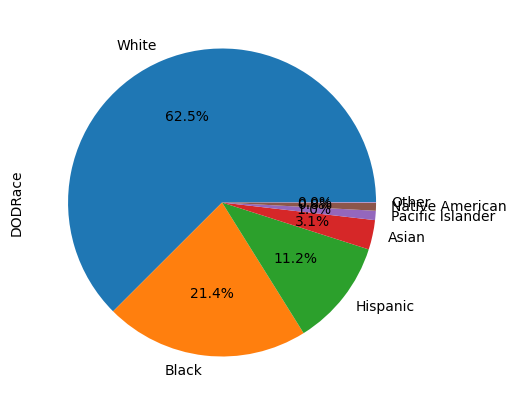

In [50]:
# check the target variable
print(df["DODRace"].value_counts())
df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(5,5));

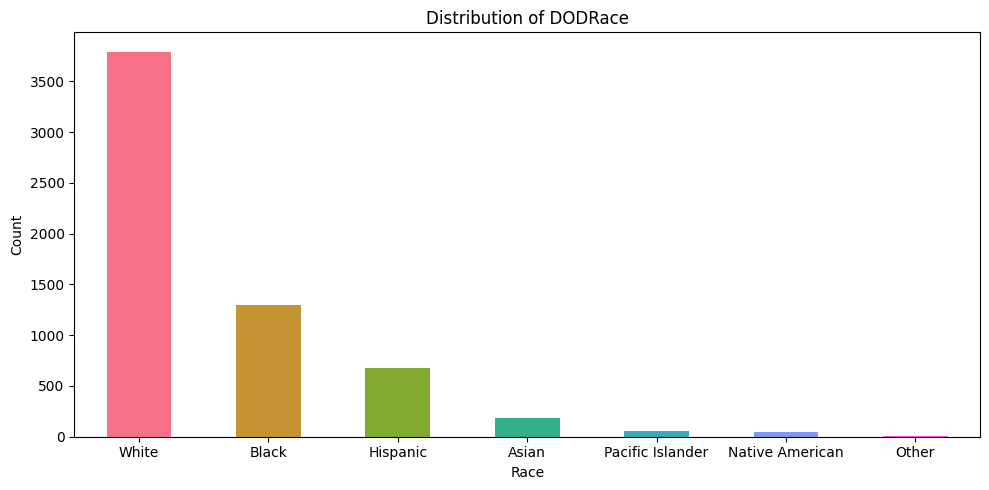

In [51]:
race_counts = df["DODRace"].value_counts().sort_values(ascending=False)
palette = sns.color_palette("husl", len(df["DODRace"].unique()))
race_counts.plot(kind="bar", figsize=(10,5), color = palette)
plt.title("Distribution of DODRace")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(range(len(race_counts.index)), race_counts.index, rotation=0)
plt.tight_layout()
plt.show()

In [52]:
race_counts

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [53]:
#drop the cols with more than 25% of missing values
cols_to_drop = [col for col in df.columns if df[col].isnull().mean() > 0.25]
# Drop these columns from the dataframe
df.drop(columns = cols_to_drop, inplace=True)

# # instructor's alternative udf (user-defined func)
# drop_list =[]
# for col in df:
#     if df[col].isnull().sum()>0:
#         print(f"{col} = {df[col].isnull().sum()}")
#         drop_list.append(col)


# drop_list


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 107 entries, subjectid to WritingPreference
dtypes: int64(98), object(9)
memory usage: 5.0+ MB


In [55]:
#dtype based check
unique_values_by_dtype = {
    dtype: {col: df[col].nunique() for col in df.select_dtypes(include=[dtype]).columns}
    for dtype in df.dtypes.unique()
}

In [56]:
#set of values for dict
df.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

In [57]:
#list of unique values
unique_values_by_dtype[np.dtype('O')]

{'Gender': 2,
 'Date': 253,
 'Installation': 12,
 'Component': 3,
 'Branch': 3,
 'PrimaryMOS': 285,
 'SubjectsBirthLocation': 152,
 'DODRace': 7,
 'WritingPreference': 3}

In [58]:
#subject_location
df.SubjectsBirthLocation.value_counts()

California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Missouri                     84
Arizona                      84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas                       63
South Da

In [59]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

Component            DODRace         
Army National Guard  White               0.685007
                     Black               0.184269
                     Hispanic            0.093427
                     Asian               0.022157
                     Native American     0.008863
                     Pacific Islander    0.006278
Army Reserve         White               0.518182
                     Black               0.236364
                     Hispanic            0.186364
                     Asian               0.040909
                     Pacific Islander    0.013636
                     Native American     0.004545
Regular Army         White               0.580573
                     Black               0.237898
                     Hispanic            0.122611
                     Asian               0.037898
                     Pacific Islander    0.012420
                     Native American     0.007643
                     Other               0.000955
Name: DODRac

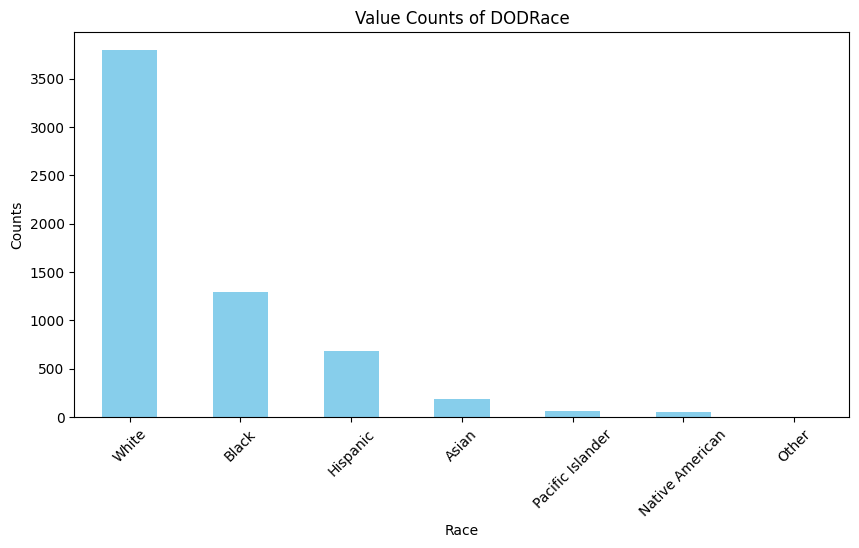

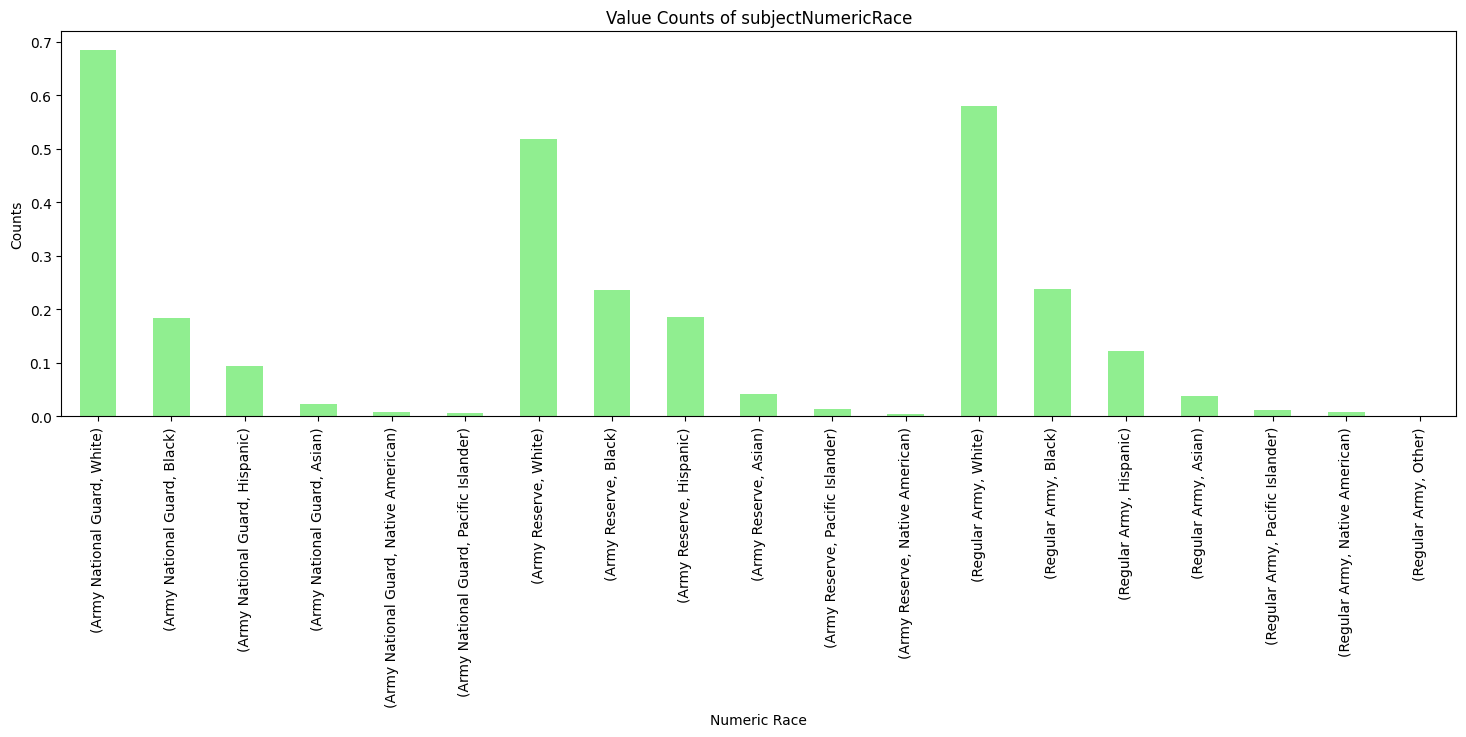

In [60]:
dod_race_counts = df['DODRace'].value_counts()
plt.figure(figsize=(10, 5))
dod_race_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts of DODRace')
plt.xlabel('Race')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

#subj#arace
subject_race_counts = df.groupby(["Component"])["DODRace"].value_counts(normalize=True)
plt.figure(figsize=(18, 5))
subject_race_counts.plot(kind='bar', color='lightgreen')
plt.title('Value Counts of subjectNumericRace')
plt.xlabel('Numeric Race')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()


In [61]:
df.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
62          8
35          8
64          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
641         2
431         2
423         2
2518        2
451         2
2351        2
318         2
425         1
238         1
358         1
48          1
42351       1
428         1
631         1
4251        1
Name: SubjectNumericRace, dtype: int64

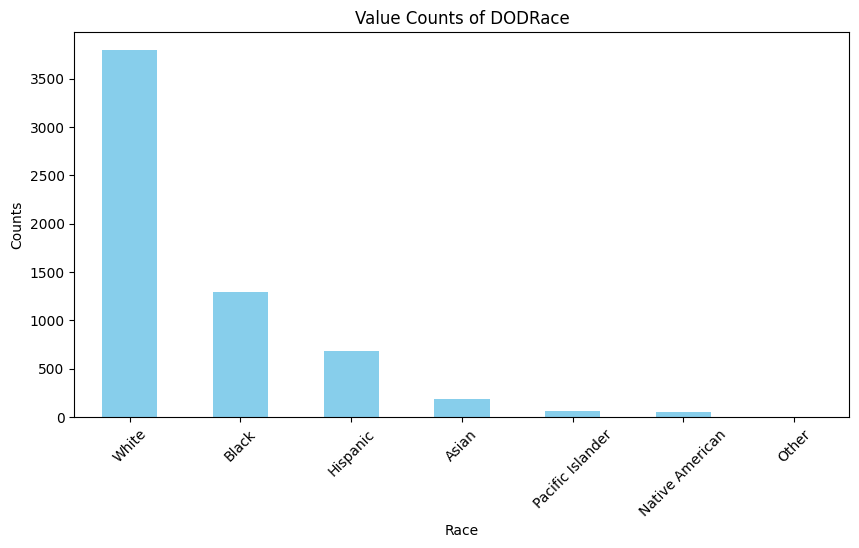

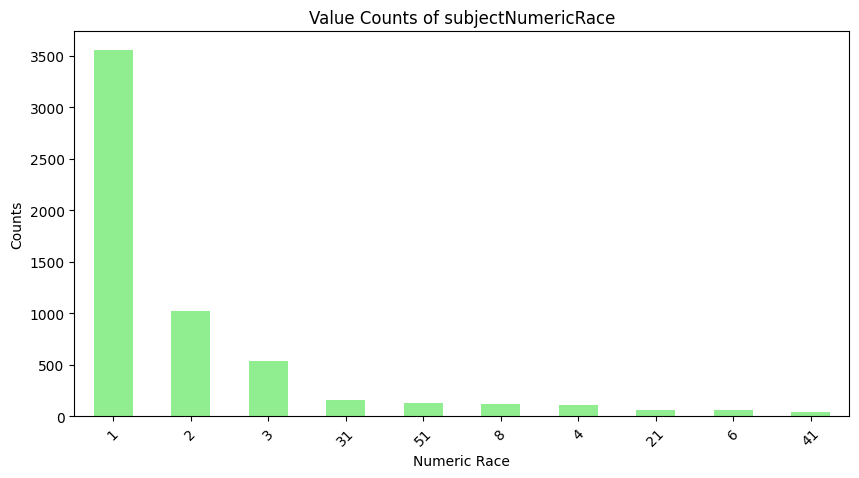

In [62]:
# DODRace
dod_race_counts = df['DODRace'].value_counts()
plt.figure(figsize=(10, 5))
dod_race_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts of DODRace')
plt.xlabel('Race')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()
#subj#arace
subject_race_counts = df['SubjectNumericRace'].value_counts().head(10)
plt.figure(figsize=(10, 5))
subject_race_counts.plot(kind='bar', color='lightgreen')
plt.title('Value Counts of subjectNumericRace')
plt.xlabel('Numeric Race')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

# possbile data leakage

In [63]:
drop_cols = ["Date", "Installation", "Component", "Branch", "PrimaryMOS", "Weightlbs", "Heightin", "SubjectNumericRace", "subjectid"]
# self-reported measures are not reliable
# subjectnumeric race is overlapping with the target column

In [64]:
df.drop(columns=drop_cols, inplace=True)


In [65]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  6068 non-null   int64 
 1   acromialheight                  6068 non-null   int64 
 2   acromionradialelength           6068 non-null   int64 
 3   anklecircumference              6068 non-null   int64 
 4   axillaheight                    6068 non-null   int64 
 5   balloffootcircumference         6068 non-null   int64 
 6   balloffootlength                6068 non-null   int64 
 7   biacromialbreadth               6068 non-null   int64 
 8   bicepscircumferenceflexed       6068 non-null   int64 
 9   bicristalbreadth                6068 non-null   int64 
 10  bideltoidbreadth                6068 non-null   int64 
 11  bimalleolarbreadth              6068 non-null   int64 
 12  bitragionchinarc                6068 non-null   

In [66]:
# slice the df for the white, black, and hispanic races // instructions-based
df1 = df[df['DODRace'].isin(['White', 'Black', 'Hispanic'])]
df1

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,Germany,Black,26,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,California,Hispanic,21,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,Texas,White,23,Right hand
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,District of Columbia,Black,22,Right hand
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,Texas,White,45,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [67]:
# keep your soul and indeces clean+
df1.reset_index(drop=True, inplace=True)

In [68]:
#check numeric values
df1.select_dtypes("number")

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,26
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,21
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,23
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,22
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,235,1353,312,216,1263,228,193,384,318,241,

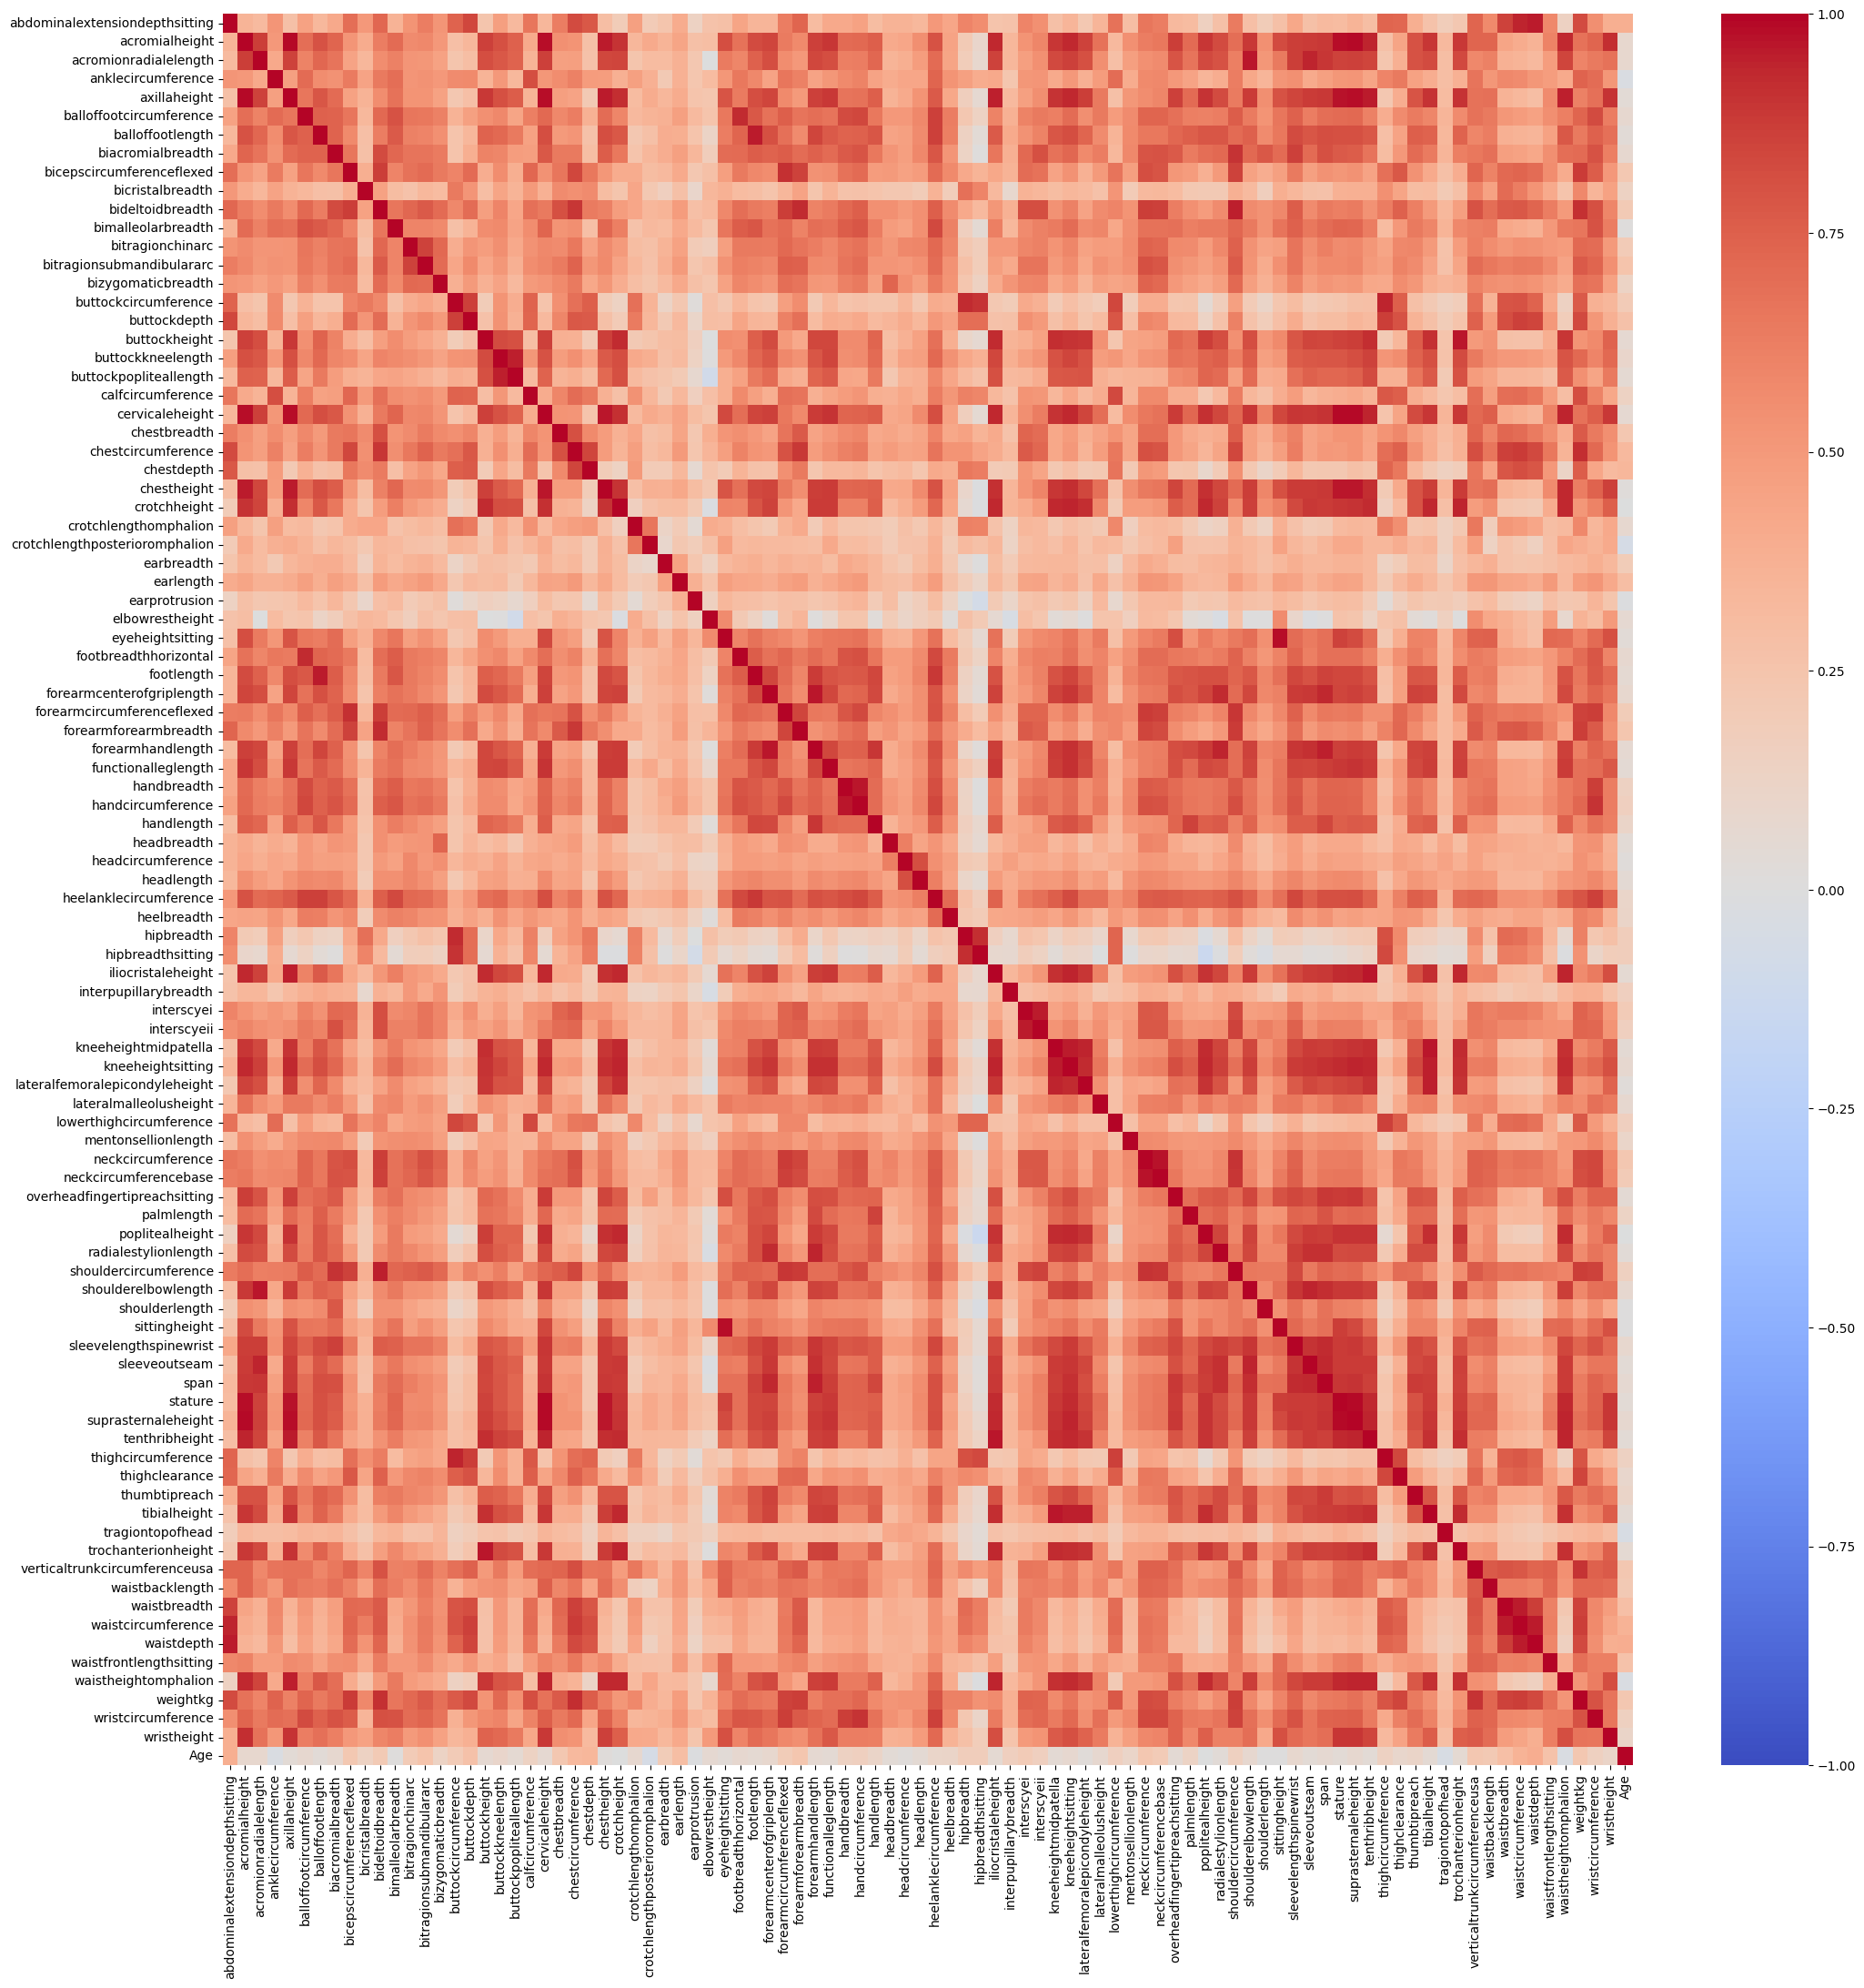

In [69]:
#check the correlation
plt.figure(figsize=(25,25))
sns.heatmap(df1.select_dtypes("number").corr(),vmin=-1, vmax=1, cmap ="coolwarm");
# shad for multicollinearity

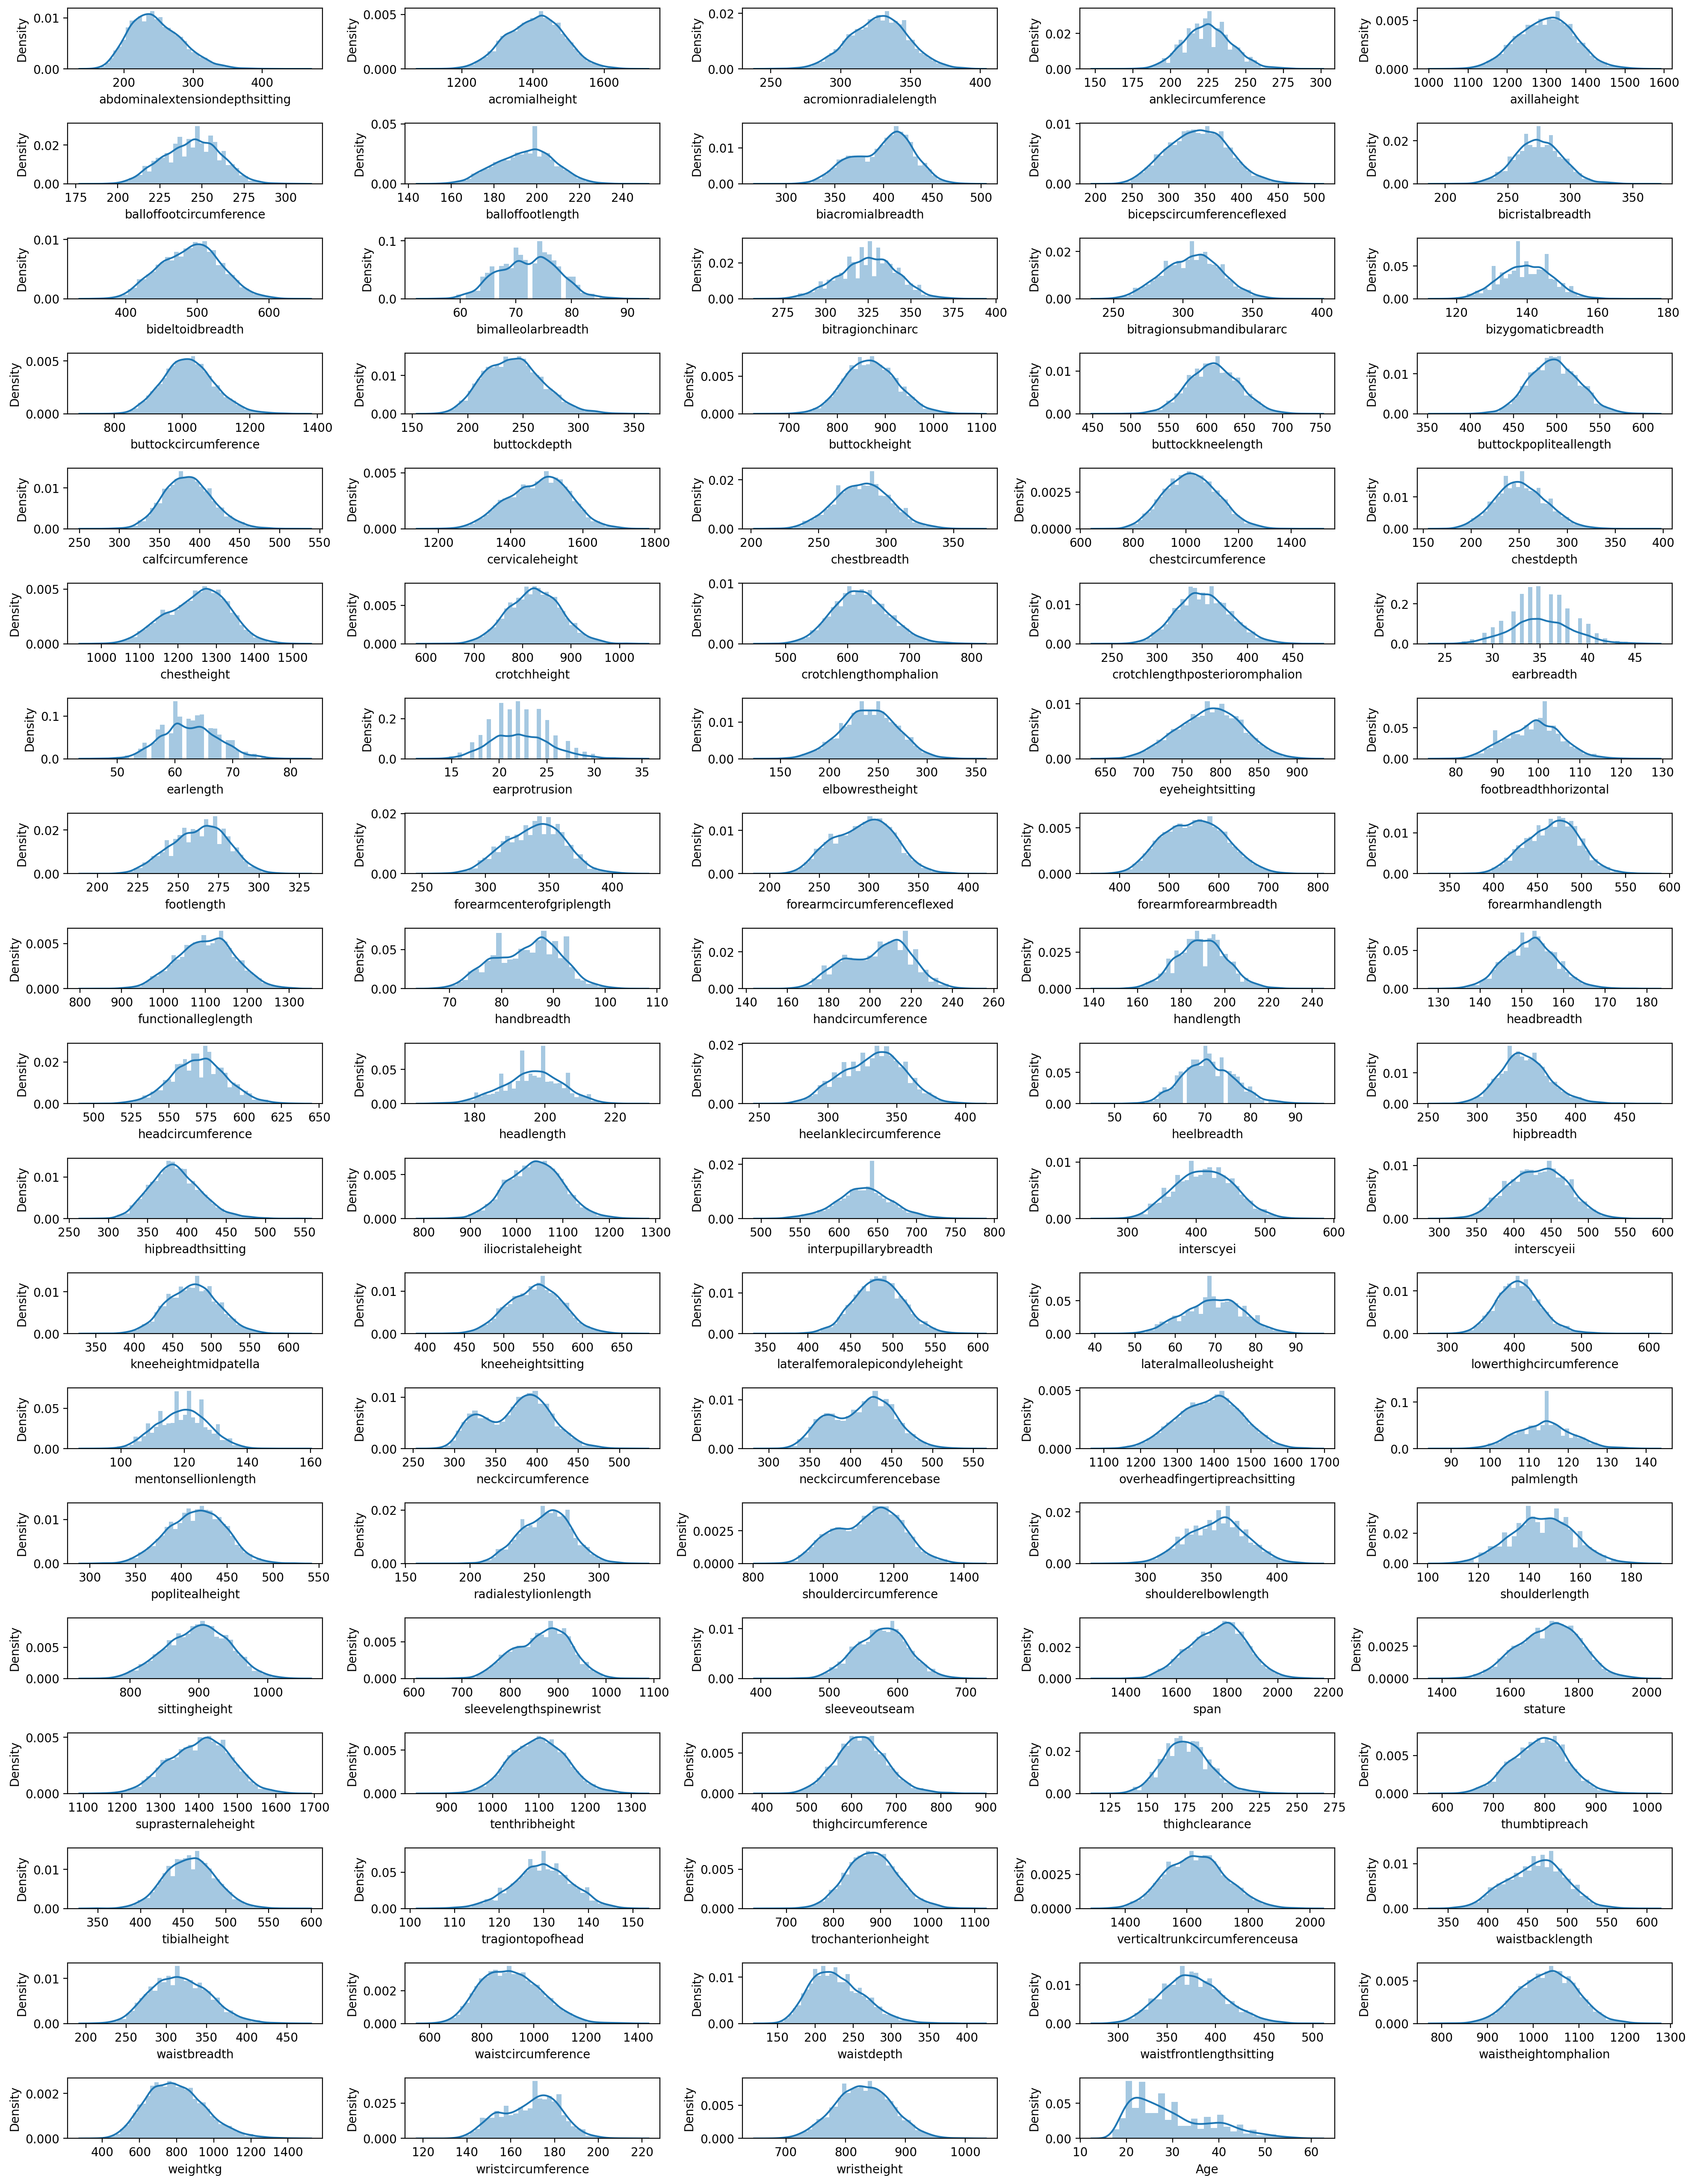

In [70]:
# # Distribution of the numericalfeatures
fig = plt.figure(figsize=(20,40), dpi=200)
for i, col in enumerate(figure_columns):
        plt.subplot(30,5,i+1)
        sns.distplot(df[col],)
plt.tight_layout();

#seems mostly normally distributed

In [71]:
#checking the ouliers
def detect_outliers(df, col_name,tukey=1.5):
    '''
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile

    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0

    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

#outliers
threshold = 1.5
out_cols = []
for col in figure_columns:
    print(
        f"{col}\nlower:{detect_outliers(df, col,threshold)[0]} \nupper:{detect_outliers(df, col,threshold)[1]}\
        \noutlier:{detect_outliers(df, col,threshold)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col,threshold)[2] > 0 :
        out_cols.append(col)
print(out_cols)
# won't be dropping for the present model testing

abdominalextensiondepthsitting
lower:141.0 
upper:349.0        
outlier:46
*-*-*-*-*-*-*
acromialheight
lower:1182.0 
upper:1630.0        
outlier:17
*-*-*-*-*-*-*
acromionradialelength
lower:270.625 
upper:383.625        
outlier:41
*-*-*-*-*-*-*
anklecircumference
lower:182.5 
upper:266.5        
outlier:77
*-*-*-*-*-*-*
axillaheight
lower:1099.0 
upper:1499.0        
outlier:30
*-*-*-*-*-*-*
balloffootcircumference
lower:196.0 
upper:292.0        
outlier:18
*-*-*-*-*-*-*
balloffootlength
lower:156.5 
upper:232.5        
outlier:18
*-*-*-*-*-*-*
biacromialbreadth
lower:308.5 
upper:488.5        
outlier:3
*-*-*-*-*-*-*
bicepscircumferenceflexed
lower:222.5 
upper:458.5        
outlier:19
*-*-*-*-*-*-*
bicristalbreadth
lower:223.0 
upper:327.0        
outlier:58
*-*-*-*-*-*-*
bideltoidbreadth
lower:370.0 
upper:610.0        
outlier:10
*-*-*-*-*-*-*
bimalleolarbreadth
lower:56.0 
upper:88.0        
outlier:6
*-*-*-*-*-*-*
bitragionchinarc
lower:281.0 
upper:369.0        
outlier:48
*

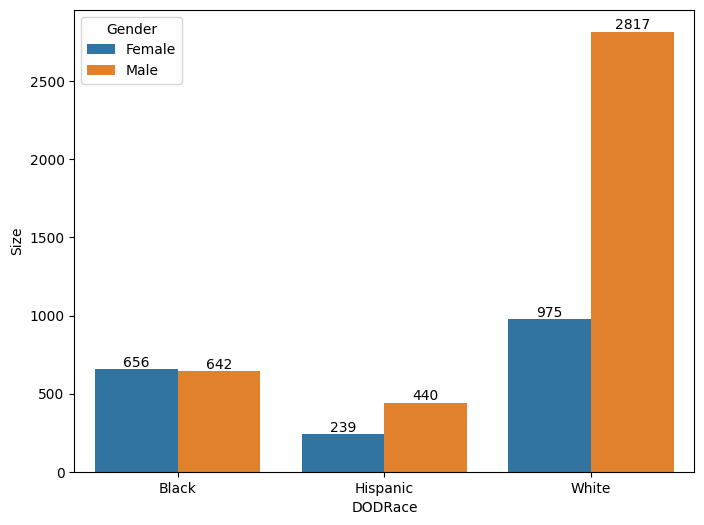

In [72]:
# gender based distribution
class_digit = df1.groupby(['DODRace', 'Gender']).size()
class_label = pd.DataFrame(class_digit, columns=['Size']).reset_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='DODRace', y='Size', hue='Gender', data=class_label)
for container in ax.containers:
    ax.bar_label(container)

#Hispanic and White races show unbalanced data where the White being the most unbalanced

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [73]:
!pip install scikit-plot

In [74]:
# test train split
X = df1.drop(columns= ["DODRace"])
y = df1.DODRace

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61, stratify = y) # stratify keep ratio for the imbalanced

In [76]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [77]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [78]:
# using the best practices for evaluation of the model - aggregated reports
def eval_metric(model, X_train, y_train, X_test, y_test):
    '''
    Description:
    This function gets a model, train and test sets and return
    the confusion matrix and classification report

    INPUT:
    model - fitted model
    X_train - input features for the training set
    y_train - target values for training set
    X_test - input features for the testing set
    y_test - target values for testing set

    RETURN:
    Nothing
    '''
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [79]:
# funciton for the training model evaluation
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : mean_squared_error(y_train, y_train_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : mean_squared_error(y_test, y_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [80]:
# lets start with the categorical features numeric labels for each category
cat = X_train.select_dtypes("object").columns
cat
column_trans = make_column_transformer((OneHotEncoder( handle_unknown='ignore',
                              sparse_output=False),
                              cat),
                              remainder = MinMaxScaler(), # for numeric
                              verbose_feature_names_out=False).set_output(transform="pandas")


# make_column_transformer is used to apply different transformations to different columns of a dataset.
#One-hot encoding converts categorical variables into binary vectors. (recommended for parametric and distance-based models)
#The underlying reason that we used OHE is to enforce the data behave to all featrures equally.
#sparse_output= This is an argument passed to the OneHotEncoder transformer to specify whether the output should be sparse or dense.
    #False: OHE'in yaptigi donusumu gormek istemiyoruz
#remainder: specifies how to handle the remaining columns that are not explicitly specified for transformation.
#MinMaxScaler scales numerical features to a specified range (usually between 0 and 1).

In [81]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(class_weight='balanced', # prevent the model from being biased towards the majority class
                                         random_state=62))]

pipe_log_model = Pipeline(steps=operations)

# there are two operations to be performed in the pipeline:
#one-hot encoding using the column_trans transformer and logistic regression using the LogisticRegression class.
#log: is a logistic regression model object that is used for binary classification problems.
#weight:balanced, the model will adjust the weights of the classes inversely proportional to their frequencies in the input data.

In [82]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Train_Set
[[ 974   35   29]
 [  18  461   64]
 [  66  346 2622]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.55      0.85      0.67       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.84      4615
weighted avg       0.91      0.88      0.89      4615


Test_Set
[[235  16   9]
 [  4 107  25]
 [ 20  92 646]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.80      1154
weighted avg       0.89      0.86      0.87      1154



In [83]:
#cross validation
# scoring parameteres
scoring = {
    "precision_White": make_scorer(precision_score, average=None, labels=["White"]),
    "recall_White": make_scorer(recall_score, average=None, labels=["White"]),
    "f1_White": make_scorer(f1_score, average=None, labels=["White"]),
    "precision_Black": make_scorer(precision_score, average=None, labels=["Black"]),
    "recall_Black": make_scorer(recall_score, average=None, labels=["Black"]),
    "f1_Black": make_scorer(f1_score, average=None, labels=["Black"]),
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=["Hispanic"]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"])
}

In [84]:
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(class_weight='balanced',random_state=79))]
model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]
# more or less close lets keep digging

test_precision_White        0.954190
train_precision_White       0.966161
test_recall_White           0.860252
train_recall_White          0.865854
test_f1_White               0.904556
train_f1_White              0.913257
test_precision_Black        0.904277
train_precision_Black       0.921223
test_recall_Black           0.916197
train_recall_Black          0.938664
test_f1_Black               0.909391
train_f1_Black              0.929854
test_precision_Hispanic     0.517918
train_precision_Hispanic    0.551032
test_recall_Hispanic        0.784848
train_recall_Hispanic       0.850626
test_f1_Hispanic            0.622098
train_f1_Hispanic           0.668796
dtype: float64

### Logistic Model GridsearchCV

In [85]:
# since the data is imbalanced I will procede with a seprarate grid for each class
scorers = {
    "recall_White": make_scorer(recall_score, average=None, labels=["White"]),
    "recall_Black": make_scorer(recall_score, average=None, labels=["Black"]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"])
}

In [86]:
#parameter grid
param_grid_log = {
    "log__C": [0.1, 0.2, 0.3], # adding 0.3 could potentially increase the accuracy
    #C parametresi regularizasyon kuvvetini etkiler. Bu da varyansi o olcude dusurur.
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
}

In [87]:
# pipeline steps
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(class_weight='balanced',
                                         random_state=79))]
model = Pipeline(steps=operations)
best_params = {}
best_scores = {}

#iterate over each class and tune the params
for label, scorer in scorers.items(): # iterate over each class from the dict
    cap_label = label.split("_")[1]
    print(f"Running GridSearchCV for {cap_label}")
    log_model_grid = GridSearchCV(model,
                                  param_grid_log,
                                  scoring=scorer,  #use the specific scorer for the current label
                                  cv=10,
                                  n_jobs=-1, #uses all available CPU cores
                                  verbose=2,
                                  return_train_score=True)
    log_model_grid.fit(X_train, y_train)
    #store the best parameters and scores
    best_params[f'recall_{cap_label}'] = log_model_grid.best_params_
    best_scores[f'recall_{cap_label}'] = log_model_grid.best_score_

Running GridSearchCV for White
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Running GridSearchCV for Black
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Running GridSearchCV for Hispanic
Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [88]:
#accessing the best-performing estimator or model found during the grid search.
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=0.3, class_weight='balanced',
                                    random_state=79))])

In [89]:
#accessing the best hyperparameters found during the grid search
best_params

{'recall_White': {'log__C': 0.1,
  'log__penalty': 'l2',
  'log__solver': 'liblinear'},
 'recall_Black': {'log__C': 0.3, 'log__penalty': 'l2', 'log__solver': 'lbfgs'},
 'recall_Hispanic': {'log__C': 0.3,
  'log__penalty': 'l2',
  'log__solver': 'lbfgs'}}

In [90]:
best_scores

{'recall_White': 0.9433179173180475,
 'recall_Black': 0.9123412994772219,
 'recall_Hispanic': 0.7718855218855218}

In [91]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

# precision: TP/(TP+FP) Model birseye dogru diyorsa %kacinda hakli (ne kadari gercekten de dogru)
# recall: TP/(TP+FN) Model pozitiflerin %kacini dogru yakalayabildi ()
#cancer etc: yanlis negatifin daha maaliyetli oldugu data setlerinde recall daha fazla onem teskil eder.
#ama yanlış pozitiflerin maliyeti yüksekse (örneğin, bir spam filtresi gibi), precision daha önemli olabilir.

#Hispanic precision score dusuk
#Macro avg basarili

Train_Set
[[ 960   41   37]
 [  26  449   68]
 [  67  363 2604]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92      1038
    Hispanic       0.53      0.83      0.64       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615


Test_Set
[[233  18   9]
 [  4 108  24]
 [ 24 102 632]]
              precision    recall  f1-score   support

       Black       0.89      0.90      0.89       260
    Hispanic       0.47      0.79      0.59       136
       White       0.95      0.83      0.89       758

    accuracy                           0.84      1154
   macro avg       0.77      0.84      0.79      1154
weighted avg       0.88      0.84      0.85      1154



In [92]:
# Define the pipeline steps
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(class_weight='balanced', random_state=79))]
#model pipeline
model = Pipeline(steps=operations)
#empty dict
cv_results = {}

# best_params for each class
for label in ['White', 'Black', 'Hispanic']:
    # model
    model.set_params(**{
        'log__C': best_params[f'recall_{label}']['log__C'],
        'log__penalty': best_params[f'recall_{label}']['log__penalty'],
        'log__solver': best_params[f'recall_{label}']['log__solver'],
    })
    #cross-validation
    scores = cross_validate(model,
                            X_train,
                            y_train,
                            scoring=scoring,
                            cv=10,
                            return_train_score=True) # train score as well

    # values
    cv_results[label] = {
        'test_precision': scores[f'test_precision_{label}'].mean(),
        'test_recall': scores[f'test_recall_{label}'].mean(),
        'test_f1': scores[f'test_f1_{label}'].mean(),
        'train_precision': scores[f'train_precision_{label}'].mean(),
        'train_recall': scores[f'train_recall_{label}'].mean(),
        'train_f1': scores[f'train_f1_{label}'].mean(),
    }
# print
for label, metrics in cv_results.items():
    print(f"Cross-validation metrics for {label}:")
    for metric_type in ['test', 'train']:
        print(f"  {metric_type.capitalize()} Metrics:")
        for metric in ['precision', 'recall', 'f1']:
            score = metrics[f'{metric_type}_{metric}']
            print(f"    {metric.capitalize()}: {score:.4f}")
    print()

Cross-validation metrics for White:
  Test Metrics:
    Precision: 0.9069
    Recall: 0.9433
    F1: 0.9246
  Train Metrics:
    Precision: 0.9095
    Recall: 0.9466
    F1: 0.9276

Cross-validation metrics for Black:
  Test Metrics:
    Precision: 0.8977
    Recall: 0.9123
    F1: 0.9043
  Train Metrics:
    Precision: 0.9121
    Recall: 0.9261
    F1: 0.9191

Cross-validation metrics for Hispanic:
  Test Metrics:
    Precision: 0.4951
    Recall: 0.7719
    F1: 0.6013
  Train Metrics:
    Precision: 0.5270
    Recall: 0.8269
    F1: 0.6437



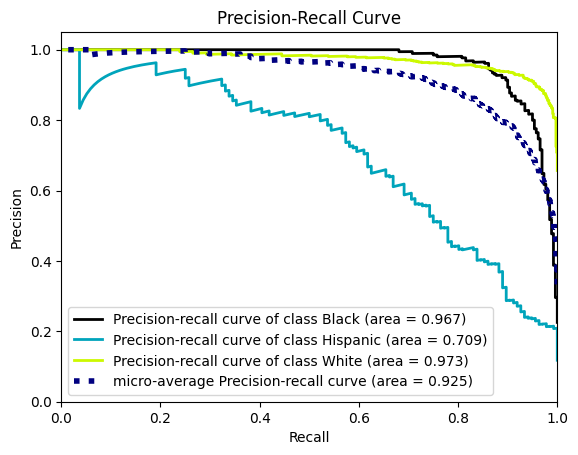

In [93]:
# plot the ROC curve
from scikitplot.metrics import plot_roc, plot_precision_recall
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(C=0.2,
                                         class_weight='balanced',
                                         random_state=79))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [94]:
# average precision score for later comparison
from sklearn.metrics import average_precision_score
y_test_dummies = pd.get_dummies(y_test).values
average_precision_score(y_test_dummies, y_pred_proba)
# for all classes

0.8829639057056374

In [95]:
#assigning them to a variable for comparison purposes
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies, y_pred_proba)
log_precision = precision_score(y_test, y_pred, average=None, labels=['White', 'Black', 'Hispanic'])
log_recall = recall_score(y_test, y_pred, average=None, labels=['White', 'Black', 'Hispanic'])

In [96]:
print(log_AP,log_precision, log_recall)

0.8829639057056374 [0.95037594 0.89272031 0.47368421] [0.83377309 0.89615385 0.79411765]


## 2. SVC

### Vanilla SVC model

In [97]:
# Vanilla means basic form of the model...
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=79))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [98]:
#let's train the model and check the results
pipe_svc_model.fit(X_train, y_train)
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Train_Set
[[ 965   35   38]
 [  22  451   70]
 [  58  414 2562]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.50      0.83      0.63       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615


Test_Set
[[231  19  10]
 [  5 110  21]
 [ 20 108 630]]
              precision    recall  f1-score   support

       Black       0.90      0.89      0.90       260
    Hispanic       0.46      0.81      0.59       136
       White       0.95      0.83      0.89       758

    accuracy                           0.84      1154
   macro avg       0.77      0.84      0.79      1154
weighted avg       0.88      0.84      0.85      1154



In [99]:
# cross-validate and chill
model = Pipeline(steps=operations_svc)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()

fit_time                    1.698301
score_time                  0.398002
test_precision_White        0.943673
train_precision_White       0.960223
test_recall_White           0.833862
train_recall_White          0.845895
test_f1_White               0.885125
train_f1_White              0.899429
test_precision_Black        0.906373
train_precision_Black       0.927367
test_recall_Black           0.907496
train_recall_Black          0.929137
test_f1_Black               0.906444
train_f1_Black              0.928243
test_precision_Hispanic     0.466141
train_precision_Hispanic    0.502954
test_recall_Hispanic        0.762593
train_recall_Hispanic       0.835481
test_f1_Hispanic            0.577471
train_f1_Hispanic           0.627865
dtype: float64

###  SVC Model GridsearchCV

In [100]:
# since the data is imbalanced I will procede with a seprarate grid for each class
scorers = {
    "recall_White": make_scorer(recall_score, average=None, labels=["White"]),
    "recall_Black": make_scorer(recall_score, average=None, labels=["Black"]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"])
}

In [101]:
#parameter grid
param_grid_svc = {
    "svc__C": [0.2, 0.3],
    'svc__gamma': ["scale", "auto"],
    'svc__kernel': ["rbf", "linear"]
}

In [ ]:
# parameter tuning
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight='balanced', random_state=79))]
model = Pipeline(steps=operations_svc)
best_params_svc  = {}
best_scores_svc = {}

#
for label, scorer in scorers.items(): # iterate over each class from the dict
    cap_label = label.split("_")[1]
    print(f"Running GridSearchCV for {cap_label}")
    svc_model_grid = GridSearchCV(model,
                                  param_grid_svc,
                                  scoring=scorer,  # Use the specific scorer for the current label
                                  cv=5,
                                  n_jobs=-1,
                                  verbose=2,
                                  return_train_score=True)
    svc_model_grid.fit(X_train, y_train)
    # Store the best parameters and scores
    best_params_svc[f'recall_{cap_label}'] = svc_model_grid.best_params_
    best_scores_svc[f'recall_{cap_label}'] = svc_model_grid.best_score_

Running GridSearchCV for White
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Running GridSearchCV for Black
Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
best_params_svc

In [ ]:
best_scores_svc

In [ ]:
svc_model_grid.best_estimator_

In [ ]:
#cross validation
# scoring parameteres
scoring = {
    "precision_White": make_scorer(precision_score, average=None, labels=["White"]),
    "recall_White": make_scorer(recall_score, average=None, labels=["White"]),
    "f1_White": make_scorer(f1_score, average=None, labels=["White"]),
    "precision_Black": make_scorer(precision_score, average=None, labels=["Black"]),
    "recall_Black": make_scorer(recall_score, average=None, labels=["Black"]),
    "f1_Black": make_scorer(f1_score, average=None, labels=["Black"]),
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=["Hispanic"]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"])
}

In [ ]:
# lets use the best parameters
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight='balanced', random_state=79))]
#model pipeline
model = Pipeline(steps=operations_svc)
#empty dict
cv_results = {}

# best_params for each class
for label in ['White', 'Black', 'Hispanic']:
    # model
    model.set_params(**{
        'svc__C': best_params_svc[f'recall_{label}']['svc__C'],
        'svc__gamma': best_params_svc[f'recall_{label}']['svc__gamma'],
        'svc__kernel': best_params_svc[f'recall_{label}']['svc__kernel'],
    })
    #cross-validation
    scores = cross_validate(model,
                            X_train,
                            y_train,
                            scoring=scoring,
                            cv=10,
                            return_train_score=True) # train score as well

    # values
    cv_results[label] = {
    'test_precision': scores[f'test_precision_{label}'].mean(),
    'test_recall': scores[f'test_recall_{label}'].mean(),
    'test_f1': scores[f'test_f1_{label}'].mean(),
    'train_precision': scores[f'train_precision_{label}'].mean(),
    'train_recall': scores[f'train_recall_{label}'].mean(),
    'train_f1': scores[f'train_f1_{label}'].mean(),
    }

# print
for label, metrics in cv_results.items():
    print(f"Cross-validation metrics for {label}:")
    for metric_type in ['test', 'train']:
        print(f"  {metric_type.capitalize()} Metrics:")
        for metric in ['precision', 'recall', 'f1']:
            score = metrics[f'{metric_type}_{metric}']
            print(f"    {metric.capitalize()}: {score:.4f}")
    print()

In [ ]:
pd.DataFrame(svc_model_grid.cv_results_).loc[svc_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

In [ ]:
eval_metric(svc_model_grid, X_train, y_train, X_test, y_test)

In [ ]:
# precision recall curve
operations1 = [("OneHotEncoder", column_trans),
              ("svc", SVC(C=0.2,
                          class_weight='balanced',
                          kernel='linear',
                          random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

operations2 = [("OneHotEncoder", column_trans),
              ("svc", SVC(C=0.3,
                          class_weight='balanced',
                          kernel='linear',
                          random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

operations3 = [("OneHotEncoder", column_trans),
              ("svc", SVC(C=0.3,
                          class_weight='balanced',
                          kernel='rbf',
                          random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();


In [ ]:
#average precision
average_precision_score(y_test_dummies, decision_function)

In [ ]:
y_pred = svc_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies, y_pred_proba)
svc_precision = precision_score(y_test, y_pred, average=None, labels=['White', 'Black', 'Hispanic'])
svc_recall = recall_score(y_test, y_pred, average=None, labels=['White', 'Black', 'Hispanic'])

In [ ]:
print(svc_AP,svc_precision, svc_recall)

## 3. RF

### Vanilla RF Model

In [ ]:
#check categorical
cat

In [ ]:
# use ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [ ]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=79))]
pipe_model_rf = Pipeline(steps=operations_rf)
pipe_model_rf.fit(X_train, y_train)

In [ ]:
pipe_model_rf.named_steps["RF_model"].feature_importances_

In [ ]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test) # overfiting the overfitted

In [ ]:
scoring

In [ ]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced",random_state=79))]
model = Pipeline(steps=operations_rf)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()
# model performs perfectly on training data but is useless for test, overfitting

### RF Model GridsearchCV

In [ ]:
param_grid_rf = {'rfc__n_estimators':[400,500],
              'rfc__max_depth':[2,3],
              'rfc__min_samples_split':[18,20,22]} #'max_features': ['sqrt', 'log2' None, 15, 20]
# min_samples_split - the closest parameter for the significance

In [ ]:
# parameter tuning
operations_rf = [("OneHotEncoder", column_trans), ("rfc", RandomForestClassifier(class_weight='balanced', random_state=79))]
model = Pipeline(steps=operations_rf)
best_params_rf = {}
best_scores_rf= {}

#execute for each class
for label, scorer in scorers.items(): # iterate over each class from the dict
    cap_label = label.split("_")[1]
    print(f"Running GridSearchCV for {cap_label}")
    rf_model_grid = GridSearchCV(model,
                                  param_grid_rf,
                                  scoring=scorer,  # Use the specific scorer for the current label
                                  cv=5,
                                  n_jobs=-1,
                                  verbose=2,
                                  return_train_score=True)
    rf_model_grid.fit(X_train, y_train)
    # Store the best parameters and scores
    best_params_rf[f'recall_{cap_label}'] = rf_model_grid.best_params_
    best_scores_rf[f'recall_{cap_label}'] = rf_model_grid.best_score_

In [ ]:
best_params_rf

In [ ]:
best_scores_rf

In [ ]:
rf_model_grid.best_score_

In [ ]:
eval_metric(rf_model_grid, X_train, y_train, X_test, y_test)

In [ ]:
#lets use the best parameters
# lets use the best parameters
operations_rf = [("OneHotEncoder", column_trans), ("rfc", RandomForestClassifier(class_weight='balanced', random_state=79))]
model = Pipeline(steps=operations_rf)
#empty dict
cv_results = {}

# best_params for each class
for label in ['White', 'Black', 'Hispanic']:
    # model
    model.set_params(**{
        'rfc__n_estimators': best_params_rf[f'recall_{label}']['rfc__n_estimators'],
        'rfc__max_depth': best_params_rf[f'recall_{label}']['rfc__max_depth'],
        'rfc__min_samples_split': best_params_rf[f'recall_{label}']['rfc__min_samples_split'],
    })
    #cross-validation
    scores = cross_validate(model,
                            X_train,
                            y_train,
                            scoring=scoring,
                            cv=10,
                            return_train_score=True) # train score as well

    # values
    cv_results[label] = {
    'test_precision': scores[f'test_precision_{label}'].mean(),
    'test_recall': scores[f'test_recall_{label}'].mean(),
    'test_f1': scores[f'test_f1_{label}'].mean(),
    'train_precision': scores[f'train_precision_{label}'].mean(),
    'train_recall': scores[f'train_recall_{label}'].mean(),
    'train_f1': scores[f'train_f1_{label}'].mean(),
    }

# print
for label, metrics in cv_results.items():
    print(f"Cross-validation metrics for {label}:")
    for metric_type in ['test', 'train']:
        print(f"  {metric_type.capitalize()} Metrics:")
        for metric in ['precision', 'recall', 'f1']:
            score = metrics[f'{metric_type}_{metric}']
            print(f"    {metric.capitalize()}: {score:.4f}")
    print()

In [ ]:
# precision recall curve
operations_rf = [("OneHotEncoder", column_trans), ("rfc", RandomForestClassifier(class_weight='balanced', max_depth=2, n_estimators=500, random_state=79))]
model = Pipeline(steps=operations_rf)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();
# the random forest is not an optimal algorithm for this task

In [ ]:
average_precision_score(y_test_dummies, y_pred_proba)

In [ ]:
y_test_dummies

In [ ]:
y_pred = rf_model_grid.predict(X_test)

rf_AP = average_precision_score(y_test_dummies, y_pred_proba)
rf_precision = precision_score(y_test, y_pred, average=None, labels=['White', 'Black', 'Hispanic'])
rf_recall = recall_score(y_test, y_pred, average=None, labels=['White', 'Black', 'Hispanic'])

In [ ]:
print(rf_AP, rf_precision, rf_recall)

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
#lets run the initial model
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=79))]
pipe_model_xgb = Pipeline(steps=operations_xgb)
# redefine the values
y_train_xgb = y_train.map({"Black":0, "Hispanic":1, "White":2})
y_test_xgb = y_test.map({"Black":0, "Hispanic":1, "White":2})


pipe_model_xgb.fit(X_train, y_train_xgb)

In [ ]:
#famous func for the evaluation
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

In [ ]:
# class weight equalize for more precise results
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',  y=y_train_xgb)
classes_weights


In [ ]:
#store into the df
dicto_micto = {"weights": classes_weights, "label":y_train_xgb}
comp = pd.DataFrame(dicto_micto)
comp.head()

In [ ]:
comp.groupby("label").value_counts() # all classed are equally weighted - Liberté, Égalité, Fraternité!


In [ ]:
pipe_model_xgb.fit(X_train,
                   y_train_xgb,
                   XGB_model__sample_weight=classes_weights)

In [ ]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

In [ ]:
# let's redefine the scoring for the numeric target classes
scoring_xgb = {
    "precision_White": make_scorer(precision_score, average=None, labels=[2]),
    "recall_White": make_scorer(recall_score, average=None, labels=[2]),
    "f1_White": make_scorer(f1_score, average=None, labels=[2]),
    "precision_Black": make_scorer(precision_score, average=None, labels=[0]),
    "recall_Black": make_scorer(recall_score, average=None, labels=[0]),
    "f1_Black": make_scorer(f1_score, average=None, labels=[0]),
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1])
}

In [ ]:
# lets test the current model
operations_xgb = [("OrdinalEncoder", column_trans),
                  ("XGB_model", XGBClassifier(random_state=79))]
model = Pipeline(steps=operations_xgb)
scores = cross_validate(model,
                        X_train,
                        y_train_xgb,
                        scoring=scoring_xgb,
                        cv=5,
                        return_train_score=True,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()
# need to adjust the parameters for there is a huge difference in test train scores (overfit)

### XGBoost Model GridsearchCV

In [ ]:
# time to grid a bit!
param_grid_xgb = {"XGB_model__n_estimators":[20, 40],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.03, 0.05],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}
# using instructors parameters since they were tested and obtained through hardcore labor

In [ ]:
#redefine the scorers for the numeric labels
scorers_xgb = {
    "recall_White": make_scorer(recall_score, average=None, labels=[2]),
    "recall_Black": make_scorer(recall_score, average=None, labels=[0]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1])
}

In [ ]:
#map the y labels
label_mapping = {"Black": 0, "Hispanic": 1, "White": 2}
y_train_numeric = y_train.map(label_mapping)
# parameter tuning for the xgb
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=79))]
model = Pipeline(steps=operations_xgb)
best_params_xgb = {}
best_scores_xgb= {}

#execute for each class
for label, scorer in scorers_xgb.items(): # iterate over each class from the dict
    cap_label = label.split("_")[1]
    print(f"Running GridSearchCV for {cap_label}")
    xgb_model_grid = GridSearchCV(model,
                                  param_grid_xgb,
                                  scoring=scorers_xgb,  # use recal for the refitting
                                  refit = label, # use the current label's scorer for refitting, man wasted so much time on this
                                  cv=5,
                                  n_jobs=-1,
                                  verbose=2,
                                  return_train_score=True)
    xgb_model_grid.fit(X_train, y_train_numeric)
    # Store the best parameters and scores
    best_params_xgb[f'recall_{cap_label}'] = xgb_model_grid.best_params_
    best_scores_xgb[f'recall_{cap_label}'] = xgb_model_grid.best_score_

In [ ]:
best_params_xgb

In [ ]:
best_scores_xgb

In [ ]:
#label mapping
label_mapping = {"White": 2, "Black": 0, "Hispanic": 1}
# lets use the best parameters
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=79))]
model = Pipeline(steps=operations_xgb)
#empty dict
cv_results = {}

# best_params for each class
for label_name, label_num in label_mapping.items():
    # model
    model.set_params(**best_params_xgb[f'recall_{label_name}'])
    #cross-validation
    scores = cross_validate(model,
                            X_train,
                            y_train.map(label_mapping),
                            scoring=scoring_xgb,
                            cv=10,
                            return_train_score=True) # train score as well

    # values
    cv_results[label_name] = {
    'test_precision': scores[f'test_precision_{label_name}'].mean(),
    'test_recall': scores[f'test_recall_{label_name}'].mean(),
    'test_f1': scores[f'test_f1_{label_name}'].mean(),
    'train_precision': scores[f'train_precision_{label_name}'].mean(),
    'train_recall': scores[f'train_recall_{label_name}'].mean(),
    'train_f1': scores[f'train_f1_{label_name}'].mean(),
    }

# print
for label, metrics in cv_results.items():
    print(f"Cross-validation metrics for {label}:")
    for metric_type in ['test', 'train']:
        print(f"  {metric_type.capitalize()} Metrics:")
        for metric in ['precision', 'recall', 'f1']:
            score = metrics[f'{metric_type}_{metric}']
            print(f"    {metric.capitalize()}: {score:.4f}")
    print()

In [ ]:
# lets plot the precision recall curve
operations_xgb = [("OrdinalEncoder", column_trans),
                  ("XGB_model", XGBClassifier(colsample_bytree=0.8,
                                              learning_rate=0.03,
                                              max_depth=2,
                                              n_estimators=20,
                                              subsample=1,
                                              random_state=79))]

model = Pipeline(steps=operations_xgb)
model.fit(X_train,
          y_train_xgb,
          XGB_model__sample_weight=classes_weights)
y_pred_proba = model.predict_proba(X_test)
plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

In [ ]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [ ]:
average_precision_score(y_test_xgb_dummies, y_pred_proba)

In [ ]:
y_pred = xgb_model_grid.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies, y_pred_proba)
xgb_precision = precision_score(y_test_xgb, y_pred, average=None, labels=[2, 0, 1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[2, 0, 1])

In [ ]:
print (xgb_AP, xgb_precision, xgb_recall)

---
---

# Let's compare the Models

In [ ]:
compare= pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                       "Precision": [log_precision[0], svc_precision[0], rf_precision[0], xgb_precision[0]],
                       "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                       "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

compare
# logistic regression seems the reasonable one

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="husl")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="husl")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="husl")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

In [ ]:
# logistic regression was selected, it has good precision and AP althogh its recall metric could be improved.

---
---

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [ ]:
# let's use the metrics suited most for Hispanic recall
best_params

In [ ]:
#final columns encoding
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat),remainder=MinMaxScaler())
# operation
operations_final = [("OneHotEncoder",column_trans_final),
                    ("log", LogisticRegression(C=0.3, penalty='l2', solver='lbfgs', class_weight='balanced',random_state=79))]
# pipeline model
final_model = Pipeline(steps=operations_final)

In [ ]:
# train
final_model.fit(X, y)

In [ ]:
male_mean_human = X[X.Gender=="Male"].describe(include="all").loc["mean"]
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"
male_mean_human["WritingPreference"] = "Right hand"
final_model.predict(pd.DataFrame(male_mean_human).T)
# average value for men in the data is close to Hispanic...but why?

In [ ]:
#let's check the scores for imbalanced datasets matthews_corrcoef
from sklearn.metrics import matthews_corrcoef
y_pred = final_model.predict(X_test)
matthews_corrcoef(y_test, y_pred)
# not bad, but could be better

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)
# same

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline


In [ ]:
#Synthetic Minority Oversampling Techniquem, fancy fancy...
#let's transfrom the cat values - One hot encoder
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=MinMaxScaler())
X_train_ohe = column_trans.fit_transform(X_train)

In [ ]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)
X_train_over.shape
y_train_over.value_counts()
# let's check the oversampling - maximizing the minority features

In [ ]:
# now let's check the undersampling
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)
y_train_under.value_counts()
# minimizing the majority features

In [ ]:
# let's apply to our y_target both methods
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [ ]:
# using imbpipeline to balance both approaches
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})
steps = [('o', over), ('u', under)]
pipeline = imbpipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)
# fine-tuned by the experimentattion pretty mcuh the same values

In [ ]:
y_resampled.value_counts()

## Logistic Regression Over/ Under Sampling

In [ ]:
# now that the values are reweighted no need for weight balance algorithm
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",sparse=False), cat), remainder=MinMaxScaler())

In [ ]:
operations = [("OneHotEncoder",column_trans),
              ('o', over),
              ('u', under),
              ("log", LogisticRegression(C=0.2,
                                         random_state=79))]

In [ ]:
smote_pipeline = imbpipeline(steps=operations)
smote_pipeline.fit(X_train, y_train)

In [ ]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

In [ ]:
model = imbpipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()
# KEEP IT SIMPLE

# SHAP

In [ ]:
!pip install shap

In [ ]:
best_params

In [ ]:
#let's transform the columns and
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore",sparse=False), cat),  remainder=MinMaxScaler(), verbose_feature_names_out=False)
X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(C=0.3,
                                class_weight='balanced',
                                random_state=79,
                                penalty="l2",
                                solver='saga')

model_shap.fit(X_train_trans, y_train)

In [ ]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

In [ ]:
# Define the pipeline steps
operations = [("OneHotEncoder", column_trans_shap),
              ("log", LogisticRegression(C=0.4, class_weight='balanced', random_state=79, penalty='l2', solver='lbfgs'))]
#model pipeline
model = Pipeline(steps=operations)
#empty dict
cv_results = {}

# best_params for each class
for label in ['White', 'Black', 'Hispanic']:
    # model
    model.set_params(**{
        'log__C': best_params[f'recall_{label}']['log__C'],
        'log__penalty': best_params[f'recall_{label}']['log__penalty'],
        'log__solver': best_params[f'recall_{label}']['log__solver'],
    })
    #cross-validation
    scores = cross_validate(model,
                            X_train,
                            y_train,
                            scoring=scoring,
                            cv=10,
                            return_train_score=True) # train score as well

    # values
    cv_results[label] = {
        'test_precision': scores[f'test_precision_{label}'].mean(),
        'test_recall': scores[f'test_recall_{label}'].mean(),
        'test_f1': scores[f'test_f1_{label}'].mean(),
        'train_precision': scores[f'train_precision_{label}'].mean(),
        'train_recall': scores[f'train_recall_{label}'].mean(),
        'train_f1': scores[f'train_f1_{label}'].mean(),
    }
# print
for label, metrics in cv_results.items():
    print(f"Cross-validation metrics for {label}:")
    for metric_type in ['test', 'train']:
        print(f"  {metric_type.capitalize()} Metrics:")
        for metric in ['precision', 'recall', 'f1']:
            score = metrics[f'{metric_type}_{metric}']
            print(f"    {metric.capitalize()}: {score:.4f}")
    print()
# model performs a bit better than instructor's; so hoooray, I guess?

In [ ]:
scoring

In [ ]:
# let's store the features for slicing
features = column_trans_shap.get_feature_names_out()
features

In [ ]:
import shap
explainer = shap.LinearExplainer(model_shap, X_train_trans)
shap_values = explainer.shap_values(X_train_trans)

In [ ]:
shap.summary_plot(shap_values,
                  max_display=300,
                  feature_names = features,
                  plot_size=(20,100),
                  class_names=["black", "hispanic", "white"])

In [ ]:
# features just for Hispanic
shap.summary_plot(shap_values[1],
                  max_display=300,
                  feature_names = features,
                  plot_size=(20,100),
                  plot_type="bar")

In [ ]:
# let's define hispanic class with selected features, where the features highly affects the prediction
hispanic=['footbreadthhorizontal',
          'headlength',
          'SubjectsBirthLocation',
          'bimalleolarbreadth',
          'tragiontopofhead',
          'Age',
          'earlength',
          'forearmcircumferenceflexed',
          'bizygomaticbreadth',
          'waistfrontlengthsitting',
          'trochanterionheight',
          'wristcircumference',
          'buttockheight',
          'elbowrestheight',
          'mentonsellionlength']

In [ ]:
len(hispanic)

In [ ]:
cat_new = X.select_dtypes("object").columns
cat_new

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42, stratify =y)

In [ ]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                           sparse=False), cat_new),
                                             remainder=MinMaxScaler(),
                                             verbose_feature_names_out=False)

operations_shap = [("OneHotEncoder",column_trans_shap),
                   ("log", LogisticRegression(C=0.4,
                                              class_weight='balanced',
                                              random_state=101,
                                              penalty="l1",
                                              solver='saga'))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

In [ ]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

In [ ]:

#model pipeline
model = Pipeline(steps=operations_shap)
#empty dict
cv_results = {}

# best_params for each class
for label in ['White', 'Black', 'Hispanic']:
    # model
    model.set_params(**{
        'log__C': best_params[f'recall_{label}']['log__C'],
        'log__penalty': best_params[f'recall_{label}']['log__penalty'],
        'log__solver': best_params[f'recall_{label}']['log__solver'],
    })
    #cross-validation
    scores = cross_validate(model,
                            X_train2,
                            y_train2,
                            scoring=scoring,
                            cv=10,
                            return_train_score=True) # train score as well

    # values
    cv_results[label] = {
        'test_precision': scores[f'test_precision_{label}'].mean(),
        'test_recall': scores[f'test_recall_{label}'].mean(),
        'test_f1': scores[f'test_f1_{label}'].mean(),
        'train_precision': scores[f'train_precision_{label}'].mean(),
        'train_recall': scores[f'train_recall_{label}'].mean(),
        'train_f1': scores[f'train_f1_{label}'].mean(),
    }
# print
for label, metrics in cv_results.items():
    print(f"Cross-validation metrics for {label}:")
    for metric_type in ['test', 'train']:
        print(f"  {metric_type.capitalize()} Metrics:")
        for metric in ['precision', 'recall', 'f1']:
            score = metrics[f'{metric_type}_{metric}']
            print(f"    {metric.capitalize()}: {score:.4f}")
    print()

In [ ]:
# lets plot
model = Pipeline(steps=operations_shap)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)

plot_precision_recall(y_test2, y_pred_proba)
plt.show();

In [ ]:
# After trying several models, it seems that logistic regression would be the optimal model for this dataset.
# One thing to consider could be the prediction power for the Hispanic class.
#The underlying reason why those several models couldn't improve the prediction for Hispanic would be about the original dataset.
#The possible future solutions might be :
  #-spending more time on EDA part (might help)
  #Reducing the number of columns
# It might be a good idea to try PCA which could greatly work to reduce dimensions.

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
# from sklearn.metrics import matthews_corrcoef
# matthews_corrcoef?
# matthews_corrcoef(y_test, y_pred)

In [ ]:
# from sklearn.metrics import cohen_kappa_score
# cohen_kappa_score?
# cohen_kappa_score(y_test, y_pred)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___